In [1]:
include("./util.jl")
include("./distributions.jl")
include("./model.jl")
include("./model_intercountry.jl")
Threads.nthreads()
theme(:ggplot2)

In [2]:
iterations = 12_000
n_sim_samples = 10
nparticles = 300
n_burn=2000

2000

In [3]:
sim_jpn_1y_IP10 = "../tmp_afp/natsal1y_inf10_sim_jpn.jld2"
sim_jpn_1y_IP7 = "../tmp_afp/natsal1y_inf7_sim_jpn.jld2"
sim_jpn_1y_IP14 = "../tmp_afp/natsal1y_inf14_sim_jpn.jld2"
sim_jpn_4w_IP10 = "../tmp_afp/natsal4w_inf10_sim_jpn.jld2"
sim_jpn_4w_IP7 = "../tmp_afp/natsal4w_inf7_sim_jpn.jld2"
sim_jpn_4w_IP14 = "../tmp_afp/natsal4w_inf14_sim_jpn.jld2"

"../tmp_afp/natsal4w_inf14_sim_jpn.jld2"

# Fit and obtain japan's trajectories

In [4]:
# Natsal 1y data, 10 day IP. 
path = fit_β(;
    α=0.10, κ=0.77, γ2=1/10, 
    days=8, max_ind_k=50,
    iterations=iterations,
    file_prefix="natsal1y_posterior_inf7",
    σ_β=0.1,
)

Progress:   1%|▎                                        |  ETA: 2:53:48

NetworkParams(0.3333333333333333, 0.14285714285714285, 8, 1239517, 0.025482802947441714, 0.1, 0.77, 50, 1, 14, 30802.890341152648)
6
[165326, 145749, 128146, 112361, 98247, 85662, 74473, 64556, 55792, 48070, 41289, 35352, 30171, 25664, 21759, 18384, 15479, 12987, 10857, 9043, 7504, 6204, 5108, 4190, 3423, 2785, 2256, 1820, 1462, 1169, 931, 738, 582, 457, 357, 277, 215, 165, 126, 96, 73, 55, 41, 31, 23, 17, 12, 9, 6, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
0
0


LoadError: InterruptException()

In [ ]:
# Natsal 4w data, 10 day IP. 
path = fit_β(;
    α=0.16, κ=0.87529, γ2=1/10, 
    days=8, max_ind_k=42,
    iterations=iterations,
    file_prefix="natsal4w_posterior_inf10",
    σ_β=0.3,
)

In [ ]:
# Natsal 4w data, 7 day IP. 
path = fit_β(;
    α=0.16, κ=0.87529, γ2=1/7, 
    days=8, max_ind_k=42,
    iterations=iterations,
    file_prefix="natsal4w_posterior_inf10",
    σ_β=0.3,
)

In [ ]:
# Natsal 4w data, 14 day IP. 
path = fit_β(;
    α=0.16, κ=0.87529, γ2=1/14, 
    days=8, max_ind_k=42,
    iterations=iterations,
    file_prefix="natsal4w_posterior_inf10",
    σ_β=0.3,
)

## Obtain Jpana's trajectories

In [6]:
path1_IP10_trace = "../tmp_afp/natsal1y_posterior_inf10_20240127_032905.jls"
path5_IP10_trace = "../tmp_afp/natsal4w_posterior_inf10_20240127_021341.jls"
path5_IP7_trace = "../tmp_afp/natsal4w_posterior_inf10_20240303_140221.jls"
path5_IP14_trace = "../tmp_afp/natsal4w_posterior_inf10_20240303_133358.jls"

"../tmp_afp/natsal4w_posterior_inf10_20240303_133358.jls"

In [7]:
sim_jpn_dir_4w_IP10 = "../tmp_afp/natsal4w_inf10_sim_jpn"
sim_jpn_dir_4w_IP7 = "../tmp_afp/natsal4w_inf7_sim_jpn"
sim_jpn_dir_4w_IP14 = "../tmp_afp/natsal4w_inf14_sim_jpn"
sim_jpn_dir_1y_IP10 = "../tmp_afp/natsal1y_inf10_sim_jpn"

"../tmp_afp/natsal1y_inf10_sim_jpn"

In [8]:
kwds = (n_sim_samples=n_sim_samples, nparticles=nparticles, n_burn=n_burn)

(n_sim_samples = 10, nparticles = 300, n_burn = 2000)

In [9]:
path = path5_IP10_trace
obtain_jpn_trajectories_for_each_β(
    path, sim_jpn_dir_4w_IP10; kwds...
)

Length of samples: 1000


Progress:   0%|▏                                        |  ETA: 3:17:13

LoadError: InterruptException:

In [ ]:
path = path1_IP10_trace
obtain_jpn_trajectories_for_each_β(
    path, sim_jpn_dir_1y_IP10; kwds...
)

In [ ]:
path = path5_IP7_trace
obtain_jpn_trajectories_for_each_β(
    path, sim_jpn_dir_4w_IP7; kwds...
)

In [ ]:
path = path5_IP14_trace
obtain_jpn_trajectories_for_each_β(
    path, sim_jpn_dir_4w_IP14; kwds...
)

### Run inter-country simulations 

In [10]:
n_inter_sim = 50_000

50000

In [15]:
include("model_intercountry.jl")

quantile_importation_dates (generic function with 1 method)

In [17]:
run_and_save_intercountry_model(sim_jpn_dir_4w_IP10; Korea_cond=false)

../tmp_results/20240415_201230


LoadError: InterruptException:

In [26]:
run_and_save_intercountry_model(sim_jpn_dir_1y_IP10; Korea_cond=true)

../tmp_results/20240410_214909


In [ ]:
run_and_save_intercountry_model(sim_jpn_dir_4w_IP7; Korea_cond=true)

In [ ]:
run_and_save_intercountry_model(sim_jpn_dir_4w_IP14; Korea_cond=true)

## Thinned samples

In [18]:
function show_traceplot(path; n_burn=2000)
    res_dic = deserialize(path)
    chn = res_dic["chn"]
    # n_burn = length(chn)*0.1 |> floor |> Int64
    chn = chn[(n_burn+1):10:end]
    chn |> display
    qs = quantile(chn; q=[0.025, 0.5, 0.975]) |> DataFrame
    q025, q50, q975 = @pipe qs[1,2:4] |> values 
    q025_r, q50_r, q975_r = round.([q025, q50, q975], digits=2)
    println("$(q50_r) ($(q025_r), $(q975_r))")
    SAR_025 = round(1 - exp(-q025), digits=3)
    SAR_50 = round(1 - exp(-q50), digits=3)
    SAR_975 = round(1 - exp(-q975), digits=3)
    println("$(SAR_50*100) ($(SAR_025*100), $(SAR_975*100))")
    plot(chn, fmt=:png, left_margin=15Plots.pt, figtype=:png, bottom_margin=6Plots.mm) |> display
end

show_traceplot (generic function with 1 method)

Chains MCMC chain (1000×1×1 Array{Float64, 3}):

Iterations        = 2001:10:11991
Number of chains  = 1
Samples per chain = 1000
parameters        = β

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64

           β    1.1540    0.4503     0.0142    0.0205   454.2778    0.9992

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5%
      Symbol   Float64   Float64   Float64   Float64   Float64

           β    0.5191    0.8323    1.0789    1.3758    2.3094


1.08 (0.52, 2.31)
66.0 (40.5, 90.10000000000001)


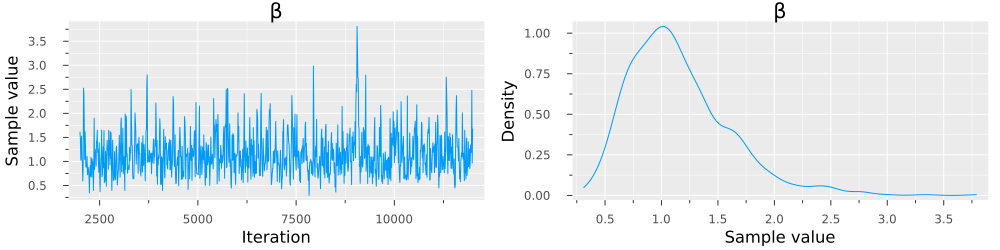

In [19]:
chn = show_traceplot(path5_IP10_trace)

In [ ]:
chn = show_traceplot(path1_IP10_trace)

In [ ]:
chn = show_traceplot(path5_IP7_trace)

In [ ]:
chn = show_traceplot(path5_IP14_trace)